# Titanic Dataset Exploratory Data Analysis

## Table of Contents

- [Introduction](#introduction)
- [Dataset Overview](#dataset-overview)
- [Exploratory Data Analysis](#exploratory-data-analysis)


## Introduction

The sinking of the RMS Titanic in 1912 is one of the most famous maritime disasters in history. The Titanic dataset contains information about passengers on board, including whether they survived or not. This EDA project aims to answer various questions about the passengers, their demographics, and their chances of survival.

## Dataset Overview

The Titanic dataset consists of the following columns:

- `PassengerId`: A unique identifier for each passenger.
- `Survived`: Indicates whether the passenger survived (1) or not (0).
- `Pclass`: The class of the ticket (1st, 2nd, or 3rd class).
- `Name`: The name of the passenger.
- `Sex`: The gender of the passenger.
- `Age`: The age of the passenger.
- `SibSp`: The number of siblings/spouses aboard.
- `Parch`: The number of parents/children aboard.
- `Ticket`: The ticket number.
- `Fare`: The fare paid for the ticket.
- `Cabin`: The cabin number.
- `Embarked`: The port at which the passenger boarded (C = Cherbourg, Q = Queenstown, S = Southampton).

## Exploratory Data Analysis

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
titanic=pd.read_csv('titanic.csv')

In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


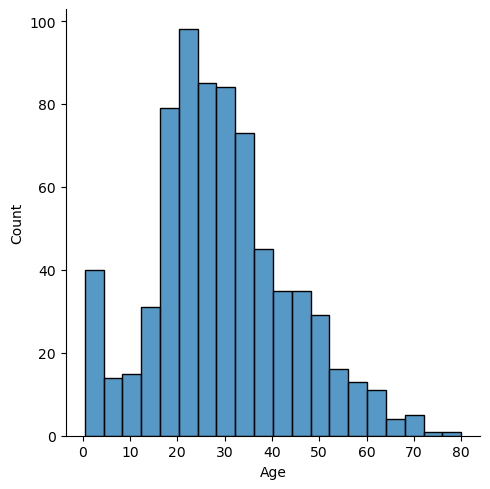

In [7]:
sns.displot(data=titanic, kind='hist', x='Age')
plt.show()

In [8]:
titanic.insert(titanic.columns.get_loc('Name')+1,'Title', titanic['Name'].str.extract('( [A-Za-z]+)\.'))
titanic.Title.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' Countess', ' Jonkheer'], dtype=object)

In [9]:
age_mean=titanic.groupby('Title')['Age'].mean().to_dict()
age_mean

{' Capt': 70.0,
 ' Col': 58.0,
 ' Countess': 33.0,
 ' Don': 40.0,
 ' Dr': 42.0,
 ' Jonkheer': 38.0,
 ' Lady': 48.0,
 ' Major': 48.5,
 ' Master': 4.574166666666667,
 ' Miss': 21.773972602739725,
 ' Mlle': 24.0,
 ' Mme': 24.0,
 ' Mr': 32.368090452261306,
 ' Mrs': 35.898148148148145,
 ' Ms': 28.0,
 ' Rev': 43.166666666666664,
 ' Sir': 49.0}

In [10]:
for key,value in age_mean.items():
    titanic.loc[(titanic['Title']==key) & (titanic['Age'].isnull()),'Age']=value
   

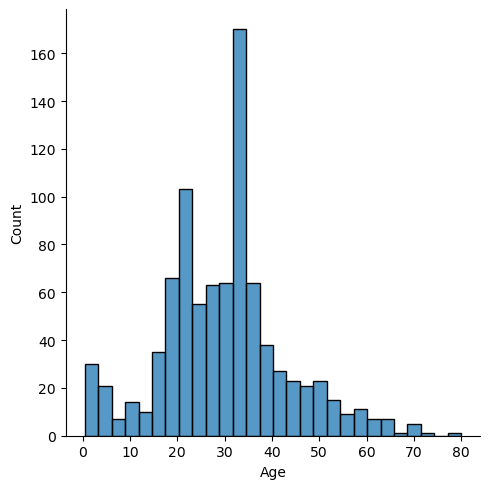

In [11]:
sns.displot(data=titanic, kind='hist', x='Age')
plt.show()

In [12]:
titanic.loc[titanic['Embarked'].isnull(),'Embarked']=titanic.Embarked.mode().values[0]
titanic.Embarked.isnull().sum()

0

In [13]:
titanic.loc[titanic['Cabin'].isnull(),'Cabin']='unknown'
titanic.Cabin.isnull().sum()

0

In [14]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Mr,male,22.0,1,0,A/5 21171,7.2500,unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",Mr,male,35.0,0,0,373450,8.0500,unknown,S


In [15]:
# pd.DataFrame(titanic['Survived'].value_counts()).transpose().plot(kind='barh', stacked=True)
# plt.show()

In [16]:
titanic['Survived'].value_counts()/titanic.shape[0]

0    0.616162
1    0.383838
Name: Survived, dtype: float64

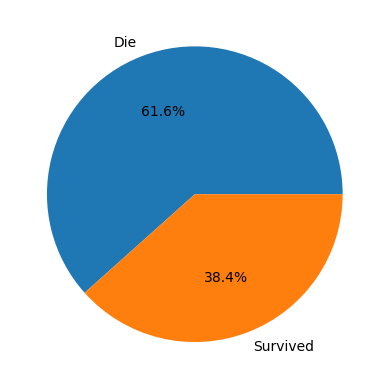

In [17]:
plt.pie(titanic['Survived'].value_counts(), labels=['Die','Survived'],autopct='%.1f%%')
plt.show()

#### Inference:
* The pie chart illustrates the proportion of passengers who survived the Titanic disaster and those who did not.

#### Survival Distribution:
* The majority of passengers did not survive the Titanic disaster, constituting a significant portion of the pie chart.
* In contrast, a relatively smaller portion of passengers survived the disaster, representing a minority of the total pie.

This visualization provides a clear visual representation of the imbalanced survival outcomes, demonstrating that a larger proportion of passengers tragically lost their lives in the Titanic disaster compared to those who managed to survive.

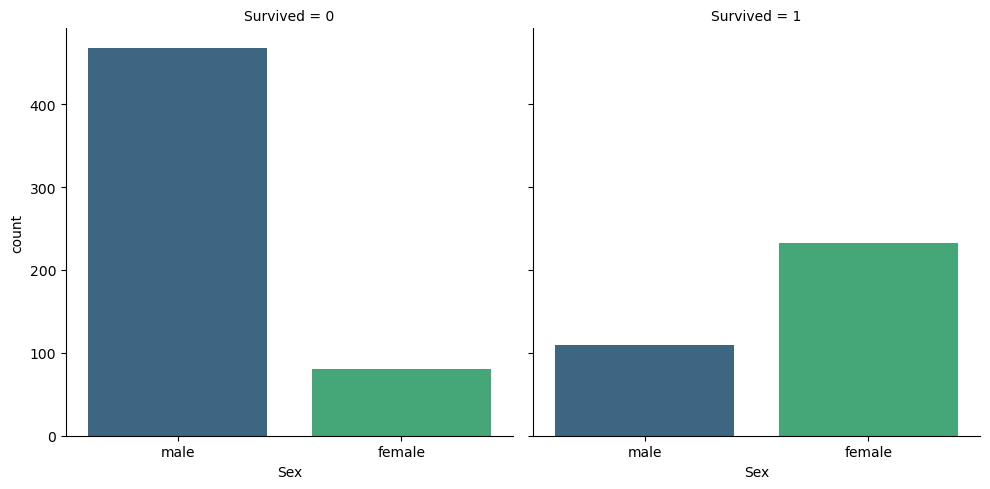

In [18]:
g=sns.catplot(data=titanic,kind='count',x='Sex',col="Survived",palette="viridis")
plt.show()

#### Inference:

* This code generates count plots that help visualize the distribution of passengers based on their gender ('Sex') and survival status ('Survived' or 'Did not survive').

#### Survival Distribution by Gender:
* For passengers who did not survive (left graph), the count of males is noticeably higher than females. This suggests that a larger proportion of male passengers did not survive.
* For those who survived (right graph), while the count of males is still higher, the gender gap is notably narrower, indicating a relatively higher proportion of female survivors.

This visualization provides insights into the relationship between gender and survival, suggesting that a larger proportion of male passengers did not survive the Titanic disaster compared to female passengers.

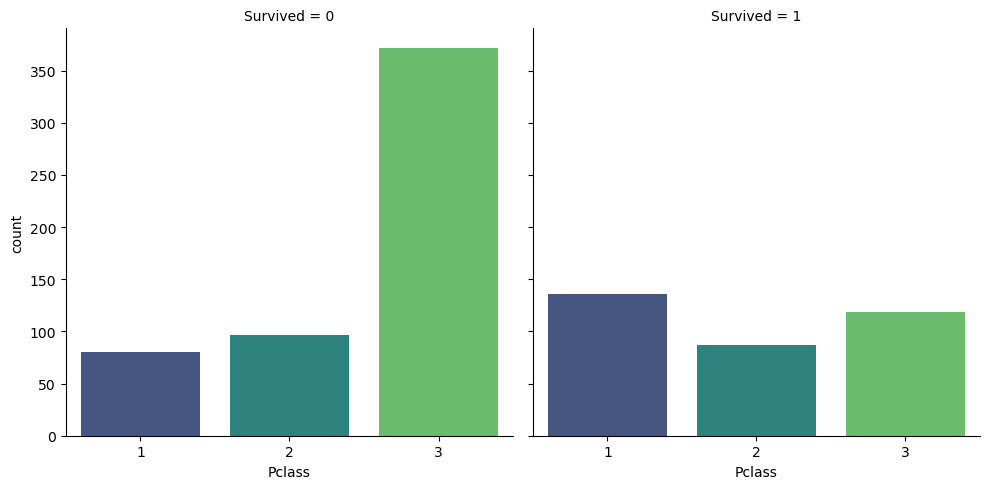

In [19]:
g=sns.catplot(data=titanic,kind='count',x='Pclass',col="Survived",palette="viridis")
plt.show()

#### Inference:

* This code produces count plots that help in understanding the distribution of passengers across different passenger classes ('Pclass') with respect to survival outcomes ('Survived' or 'Did not survive').

#### Survival Distribution by Passenger Class:
* For passengers who did not survive (left graph), a significant proportion were from the third class ('Pclass 3'), indicating a higher number of non-survivors in this class.
* For those who survived (right graph), the majority were from the first class ('Pclass 1'), followed by the third class ('Pclass 3'). This suggests a higher number of survivors from the first class compared to other classes.

This visualization provides insights into the relationship between passenger class and survival, highlighting a higher proportion of non-survivors from the third class and a higher proportion of survivors from the first class.

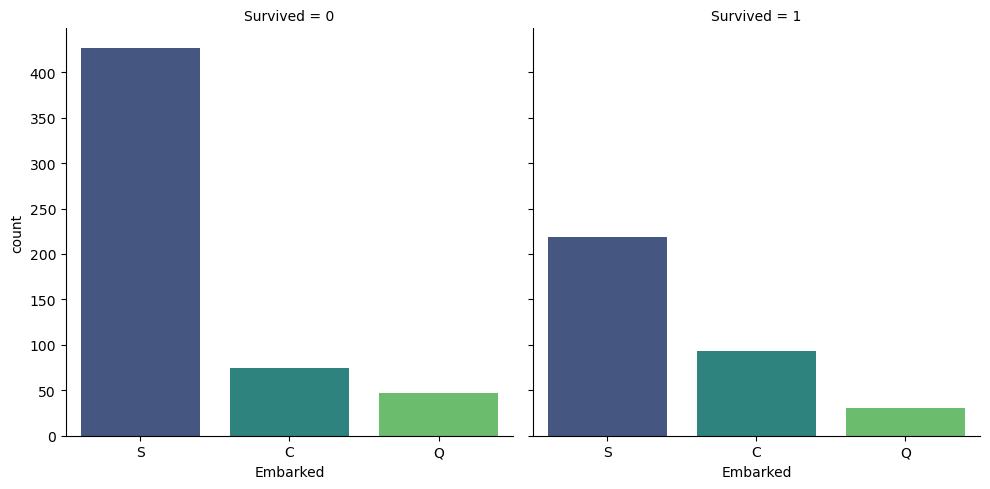

In [20]:
g=sns.catplot(data=titanic,kind='count',x='Embarked',col="Survived",palette="viridis")
plt.show()

#### Inference:

* This code generates count plots to visually interpret the distribution of passengers based on their embarkation port ('Embarked') and survival outcomes ('Survived' or 'Did not survive').

#### Survival Distribution by Embarkation Port:
* For passengers who did not survive (left graph), the majority embarked from Southampton ('S'), followed by Cherbourg ('C'), and then Queenstown ('Q'). The count of non-survivors is notably higher for passengers who boarded in Southampton.
* For those who survived (right graph), a similar pattern is observed, with the highest count of survivors also embarking from Southampton ('S'), followed by Cherbourg ('C') and Queenstown ('Q').

This visualization provides insights into the relationship between embarkation port and survival, showing that the majority of both survivors and non-survivors boarded from Southampton, and there is a notable difference in survival rates based on the embarkation port.

In [21]:
age_bins =[0,1,12,18,30,50,100]
age_labels=['Infants','Children','Teenagers','Yong Aduls','Aduls','Seniors']
titanic['AgeGroup']=pd.cut(titanic['Age'],bins=age_bins,labels=age_labels)

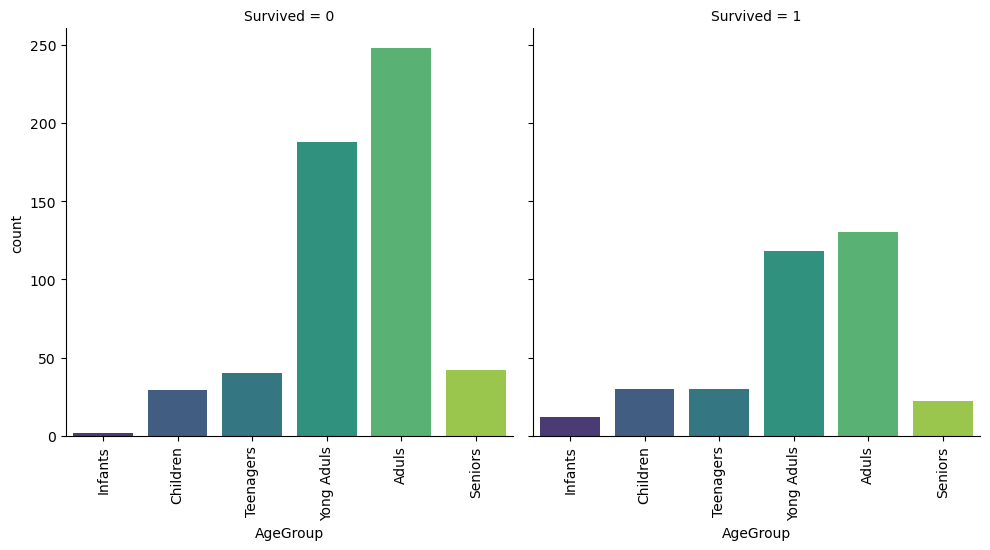

In [22]:
g=sns.catplot(data=titanic,kind='count',x='AgeGroup',col="Survived",palette="viridis")
g.set_xticklabels(rotation=90)
plt.show()

#### Inference:

* This updated code generates count plots to visualize the distribution of passengers in various age groups ('AgeGroup') based on their survival outcomes ('Survived' or 'Did not survive').

#### Survival Distribution by Age Group:

* For passengers who did not survive (left column), the highest count is in the 'Young Adults' age group, followed by 'Adults' and 'Seniors'.
* For those who survived (right column), the 'Young Adults' age group has the highest count, followed by 'Adults' and 'Seniors'.

The count plots provide insights into the distribution of survivors and non-survivors across different age groups, shedding light on age-related patterns in survival rates.

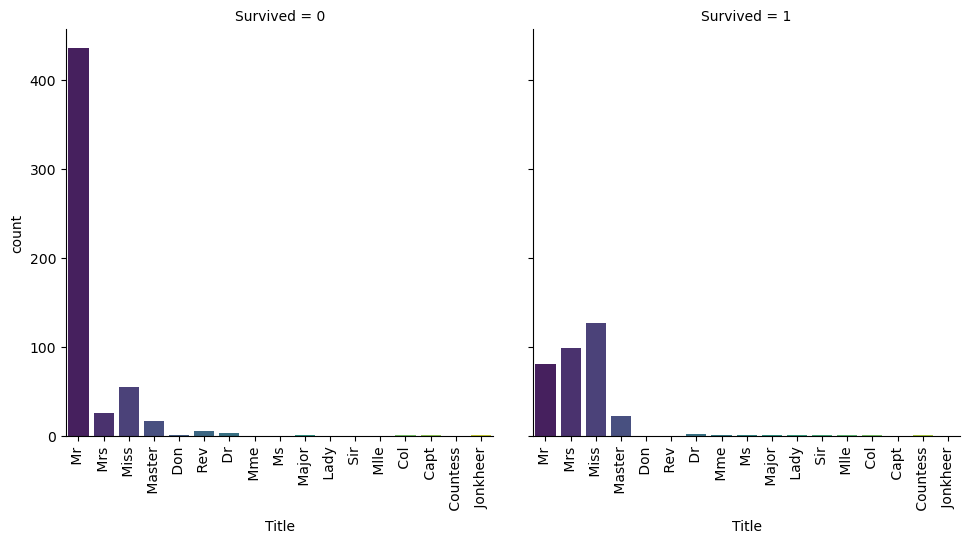

In [23]:
g=sns.catplot(data=titanic,kind='count',x='Title',col="Survived",palette="viridis")
g.set_xticklabels(rotation=90)
plt.show()

#### Inference:

* This code generates count plots to visualize the distribution of passengers based on their titles and survival outcomes ('Survived' or 'Did not survive').

#### Survival Distribution by Title:

* For passengers who did not survive (left column), the highest count is attributed to the title 'Mr', followed by 'Miss' and 'Mrs'.
* For those who survived (right column), 'Miss' has the highest count, followed by 'Mrs' and 'Mr'.

The count plots provide insights into the distribution of survivors and non-survivors based on titles, offering information on how different titles may have influenced survival rates during the Titanic disaster.

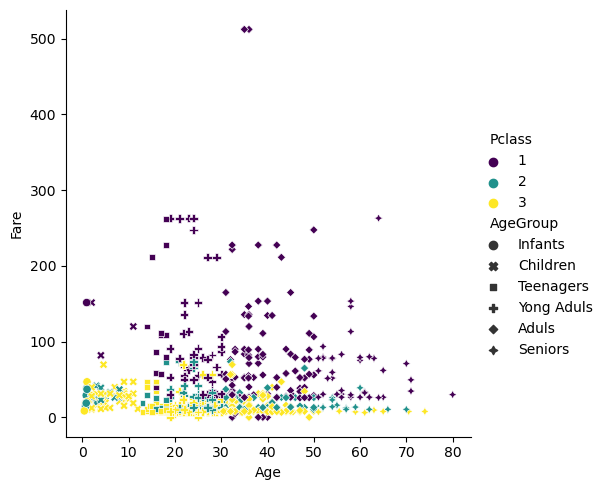

In [24]:
sns.relplot(data=titanic, kind='scatter', x='Age', y='Fare', hue='Pclass',style='AgeGroup',palette="viridis")
plt.show()

#### Inference:

* The scatter plot illustrates the relationship between age ('Age') and fare ('Fare') for passengers aboard the Titanic, with different passenger classes ('Pclass') distinguished by color and age groups ('AgeGroup') indicated by different marker styles.

#### Age, Fare, and Passenger Class:

* Higher fares are associated with a wide range of ages and are prevalent across all passenger classes, but notably in the first class ('Pclass 1').
* The majority of passengers with lower fares are observed in the third class ('Pclass 3').
* Different marker styles representing age groups ('AgeGroup') allow for a visual understanding of age distributions within each passenger class and fare range.

This scatter plot helps in understanding the distribution and relationships between age, fare, passenger class, and age groups, providing valuable insights into the demographics of the Titanic passengers.

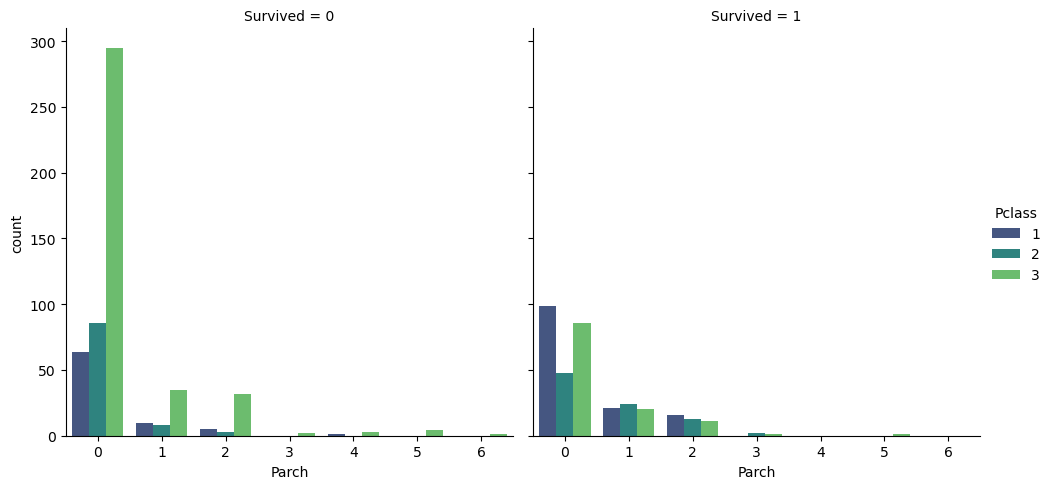

In [25]:
g=sns.catplot(data=titanic,kind='count',x='Parch',col="Survived",hue='Pclass',palette="viridis")
plt.show()

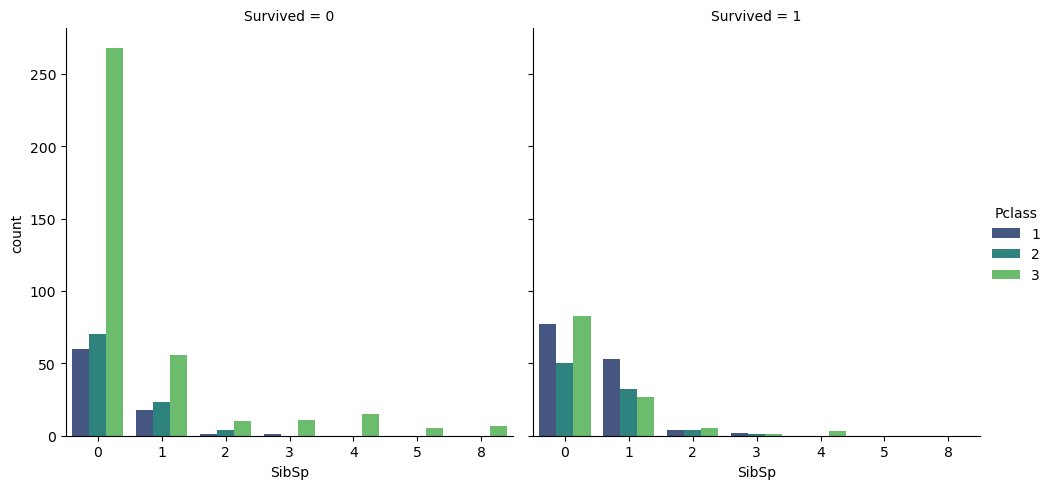

In [26]:
g=sns.catplot(data=titanic,kind='count',x='SibSp',col="Survived",hue='Pclass',palette="viridis")
plt.show()

#### Inference:

* The code generates count plots to help visualize the distribution of passengers based on the number of siblings or spouses ('SibSp') they had on board, grouped by survival outcomes ('Survived' or 'Did not survive'). Additionally, the plots differentiate passenger classes ('Pclass') through color representation.

#### Survival Distribution by Number of Siblings/Spouses:

* For passengers who did not survive (left graph), the majority had no siblings or spouses ('SibSp 0'). The count decreases as the number of siblings or spouses increases.
* For those who survived (right graph), a similar trend is observed, with the highest count for passengers having no siblings or spouses ('SibSp 0'), followed by a decrease as the number of siblings or spouses increases.

The count plots provide insights into how the number of siblings or spouses on board may have affected survival rates, considering different passenger classes.


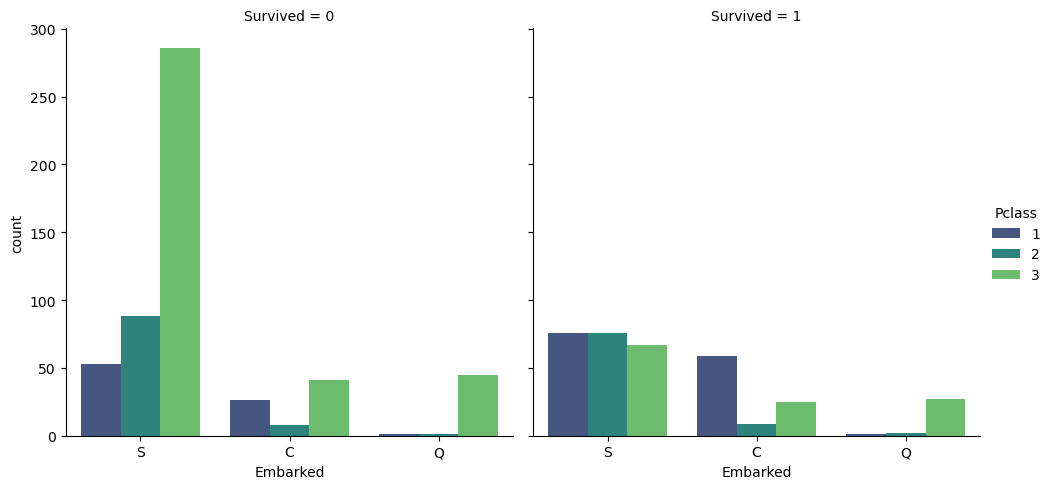

In [27]:
g=sns.catplot(data=titanic,kind='count',x='Embarked',col="Survived",hue='Pclass',palette="viridis")
plt.show()

#### Inference:

* The code generates count plots to visualize the distribution of passengers based on their embarkation port ('Embarked'), grouped by survival outcomes ('Survived' or 'Did not survive'). Furthermore, the plots differentiate passenger classes ('Pclass') through color representation.

#### Survival Distribution by Embarkation Port:

* For passengers who did not survive (left column), the majority embarked from Southampton ('S'), followed by Cherbourg ('C'), and then Queenstown ('Q').
* For those who survived (right column), the majority also embarked from Southampton ('S'), followed by Cherbourg ('C'), and then Queenstown ('Q').

The count plots provide insights into how the embarkation port may have influenced survival rates, considering different passenger classes.